In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
data = pd.read_csv("data/listings_clean.csv")

In [25]:
price_stats = {
    "count": data["price"].count(),
    "mean": data["price"].mean(),
    "median": data["price"].median(),
    "min": data["price"].min(),
    "max": data["price"].max(),
    "std": data["price"].std(),
    "q1": data["price"].quantile(0.25),
    "q3": data["price"].quantile(0.75)
}

price_stats

{'count': np.int64(62684),
 'mean': np.float64(213.36605832429328),
 'median': np.float64(135.0),
 'min': np.float64(6.0),
 'max': np.float64(74100.0),
 'std': np.float64(860.901556534754),
 'q1': np.float64(75.0),
 'q3': np.float64(225.0)}

<Axes: xlabel='price', ylabel='Count'>

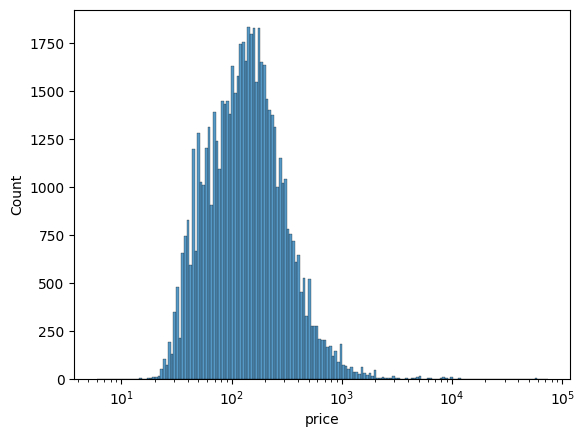

In [39]:
sns.histplot(data["price"], log_scale=True)